# Single Point and Optimization Calculations

After running `scripts/2_compute.py` analyze your results here!

In [1]:
from pathlib import Path

from qcio import Structure, view, ProgramOutput, align
from qcio.constants import HARTREE_TO_KCAL_PER_MOL

In [2]:
# Constants
DATA_DIR = Path("../data")
STRUCT_DIR = DATA_DIR / "structures"
CALC_DIR = DATA_DIR / "calcs"

## Open and Inspect Results

All computational results can be opened with `ProgramOuput.open("path/to/file.json")` and then passed to `view.view(...)` to get a visualization.

In [3]:
u2_energy = ProgramOutput.open(CALC_DIR / "u2-anion-crest-energy.json")
u3_energy = ProgramOutput.open(CALC_DIR / "u3-anion-crest-energy.json")

In [4]:
# Pass one or many objects, to view.view(...)
view.view(u2_energy) 

### You can still pass any of the parameters to `view.view(...)` you leanred about in `1_structures.ipynb` to enhance or modify your view.


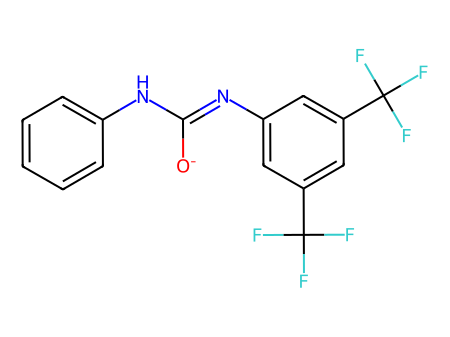

In [5]:
view.view(u3_energy, view_2d=True)

## Analyze Optimizations

In [6]:
u2_opt = ProgramOutput.open(CALC_DIR / "u2-anion-crest-optimization.json")
u3_opt = ProgramOutput.open(CALC_DIR / "u3-anion-crest-optimization.json")


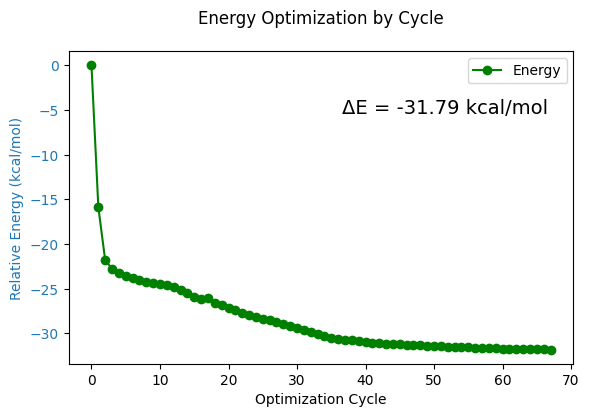

In [7]:
view.view(u2_opt, titles=["Woah! Watch it optimize!"])


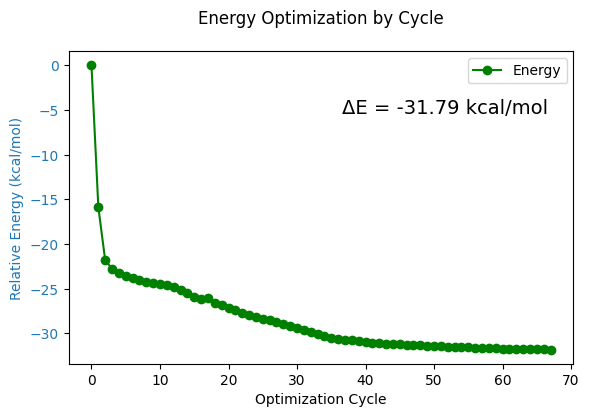

In [8]:
view.view(u2_opt, animate=False, subtitles=["No animation for lower CPU utilization"])

### Each Step of the Optimization is Available to You

In [9]:
# View the last single point calculation in the opt trajectory
view.view(u2_opt.results.trajectory[-1])

## Your Exact Inputs are Saved for Every Calculation
This makes it easy to know exactly how you computed a result and how to do it again if needed! Pass this input data (or a modfied version of it) to `compute()` and you can reproduce the calculation exactly.

In [10]:
u2_opt.input_data

ProgramInput(keywords={'calculation': {'level': [{'alpb': 'ch2cl2'}]}}, structure=Structure(formula='C16H8F9N2O'), extras={'save_path': '/home/cbh/dev/personal/qcworkflow/data/calcs/u2-anion-crest-optimization.json'}, model=Model(method='gfnff'), calctype='optimization')

## Provenance Information is Available for Every Calculation
So you always know what program produced the result.

In [11]:
u2_opt.provenance

Provenance(program='crest', program_version='3.0.2', scratch_dir='/tmp/tmpc3kdz9u1', wall_time=0.329269, hostname='fire-11-05', hostcpus=48)

## See Stdout
All data from a calculation is returned to you. We did not request the files, but ChemCloud can also return all the scratch files created for you as well by passing `compute(..., collect_files=True)`

In [12]:
u3_opt.pstdout


       ╔════════════════════════════════════════════╗
       ║            ___ ___ ___ ___ _____           ║
       ║           / __| _ \ __/ __|_   _|          ║
       ║          | (__|   / _|\__ \ | |            ║
       ║           \___|_|_\___|___/ |_|            ║
       ║                                            ║
       ║  Conformer-Rotamer Ensemble Sampling Tool  ║
       ║          based on the xTB methods          ║
       ║                                            ║
       ╚════════════════════════════════════════════╝
       Version 3.0.2, Thu, 29 August 14:20:46, 08/29/2024
       commit (65685a7) compiled by 'usr@d37571da525e'

   Cite work conducted with this code as

   • P.Pracht, F.Bohle, S.Grimme, PCCP, 2020, 22, 7169-7192.
   • S.Grimme, JCTC, 2019, 15, 2847-2862.
   • P.Pracht, S.Grimme, C.Bannwarth, F.Bohle, S.Ehlert,
     G.Feldmann, J.Gorges, M.Müller, T.Neudecker, C.Plett,
     S.Spicher, P.Steinbach, P.Wesołowski, F.Zeller,
     J. Chem. Phys., 2024, 160,